# What is machine learning ?

## Supervised learning


<img src="figures/supervised_workflow.svg" width=100%>

# Data Representations

<img src="figures/data_representation.svg" width=100%>

# Dataset Split

<img src="figures/train_test_split_matrix.svg" width=100%>

In [1]:
#% matplotlib nbagg
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


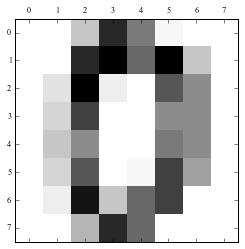

In [5]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys)

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Splitting the data:

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Exercises

Load the iris dataset from the ``sklearn.datasets`` module using the ``load_iris`` function.
The function returns a dictionary-like object that has the same attributes as ``digits``.

What is the number of classes, features and data points in this dataset?
Use a scatterplot to visualize the dataset.

You can look at ``DESCR`` attribute to learn more about the dataset.

In [10]:
# %load solutions/load_iris.py

In [11]:
from sklearn.datasets import load_iris

In [12]:
dd = load_iris()

In [13]:
dd.viewkeys()

dict_keys(['target_names', 'data', 'target', 'DESCR', 'feature_names'])

In [14]:
dd['data'].shape

(150, 4)

In [22]:
print(dd['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dd['data'], dd['target'])

In [16]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((112, 4), (38, 4), (112,), (38,))

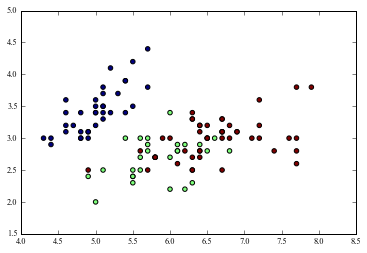

In [47]:
plt.scatter( X_train2[:,0], X_train2[:,1], c=y_train2 )

In [23]:
from sklearn.svm import LinearSVC

In [24]:
svm = LinearSVC(C=0.1)

In [32]:
svm.fit(X_train2, y_train2)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [33]:
print(svm.predict(X_train2))
print(y_train2)

[0 2 2 2 0 0 2 2 1 2 2 2 2 1 1 1 2 1 0 0 0 2 2 0 0 1 2 0 1 2 0 1 0 0 2 1 0
 2 0 1 1 2 0 0 0 1 1 2 2 0 2 2 1 2 0 0 2 1 2 1 0 2 0 2 2 0 0 2 1 2 2 2 1 0
 1 2 2 2 0 1 1 2 1 0 1 0 2 2 2 0 1 1 0 2 2 2 2 1 0 0 1 0 1 1 1 2 0 2 2 0 1
 0]
[0 2 2 2 0 0 2 2 1 2 2 1 2 1 1 1 2 1 0 0 0 1 2 0 0 1 2 0 1 2 0 1 0 0 2 1 0
 2 0 1 1 2 0 0 0 1 1 2 2 0 2 2 1 1 0 0 2 1 2 1 0 2 0 2 2 0 0 2 1 2 2 2 1 0
 1 1 2 2 0 1 1 2 1 0 1 0 2 2 2 0 1 1 0 2 2 2 2 1 0 0 1 0 1 1 1 2 0 2 2 0 1
 0]


In [34]:
svm.score(X_train2, y_train2)

0.9642857142857143

In [35]:
svm.score(X_test2, y_test2)

0.86842105263157898

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=50)

In [42]:
rf.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
rf.score(X_train2, y_train2)

1.0

In [45]:
rf.score(X_test2, y_test2)

0.89473684210526316